<a href="https://colab.research.google.com/github/MuhammadDanyialKhan/Google-Colaboratory-Notebooks/blob/master/Fasion_MNIST_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dependencies


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# import tensorflow and tfds
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# import helper libs
import math
import numpy as np
import matplotlib.pyplot as plt

# print tf version
print(tf.__version__)

tf.enable_eager_execution()

W0803 07:06:12.791713 139789637547904 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



1.14.0


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Import the Fashion MNIST dataset

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
Train_dataset, Test_dataset = dataset['train'], dataset['test']

W0803 07:06:13.399990 139789637547904 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

## Explore dataset

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))


Number of training examples: 60000
Number of test examples: 10000


## Processing Data

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images,labels

# The map function applies the normalize function to each element in the train
# and test datasets
Train_dataset = Train_dataset.map(normalize)
Test_dataset  = Test_dataset.map(normalize)

## Explore the processed data

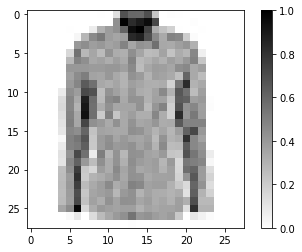

In [7]:
# Take a single image, and remove the color dimension by reshaping
for image, label in Test_dataset.take(1):
  break

image = image.numpy().reshape(28,28)

# plot the image - voila a piece of fashion cloathing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

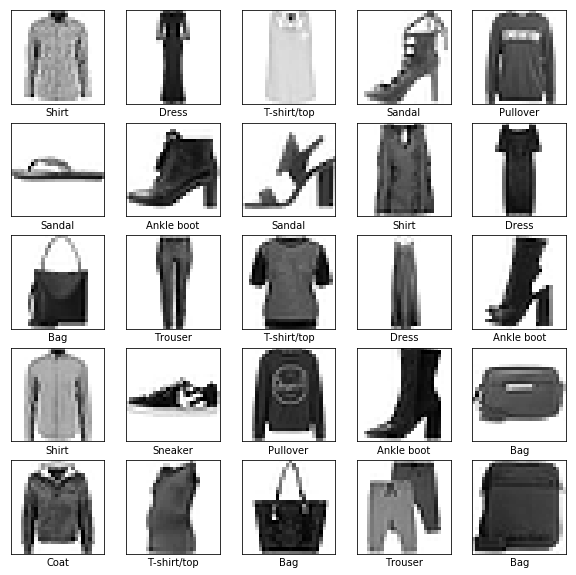

In [8]:
plt.figure(figsize=(10,10))
i = 0
for image, label in Test_dataset.take(25):
  image = image.numpy().reshape(28,28)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1

plt.show()

## Build the model

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, tf.nn.relu),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## compile the model

In [0]:
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## train the model

In [0]:
BATCH_SIZE = 32
Train_dataset = Train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
Test_dataset = Test_dataset.batch(BATCH_SIZE)

In [14]:
model.fit(Train_dataset, epochs=10, steps_per_epoch=math.ceil(num_test_examples/BATCH_SIZE))

Epoch 1/10
313/313 [==============================] - 11s 35ms/step - loss: 0.3396 - acc: 0.8746
Epoch 2/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3383 - acc: 0.8770
Epoch 3/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3338 - acc: 0.8795
Epoch 4/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3214 - acc: 0.8826
Epoch 5/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3339 - acc: 0.8777
Epoch 6/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3287 - acc: 0.8816
Epoch 7/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3111 - acc: 0.8797
Epoch 8/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3043 - acc: 0.8899
Epoch 9/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3037 - acc: 0.8872
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3055 - acc: 0.8895


## Evaluate Accurace

In [15]:
test_loss, test_accuracy = model.evaluate(Test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.3552 - acc: 0.8722
Accuracy on test dataset: 0.8722


## Make predictions and Explore

In [0]:
for test_images, test_labels in Test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)


In [17]:
predictions.shape

(32, 10)

In [18]:
predictions[0]

array([1.4043531e-04, 3.3606852e-08, 3.6200176e-03, 6.6067048e-05,
       7.5357854e-02, 8.3867711e-08, 9.2076212e-01, 5.0293902e-09,
       5.3280011e-05, 4.1175738e-08], dtype=float32)

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

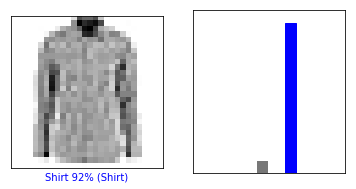

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

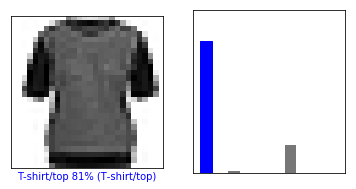

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

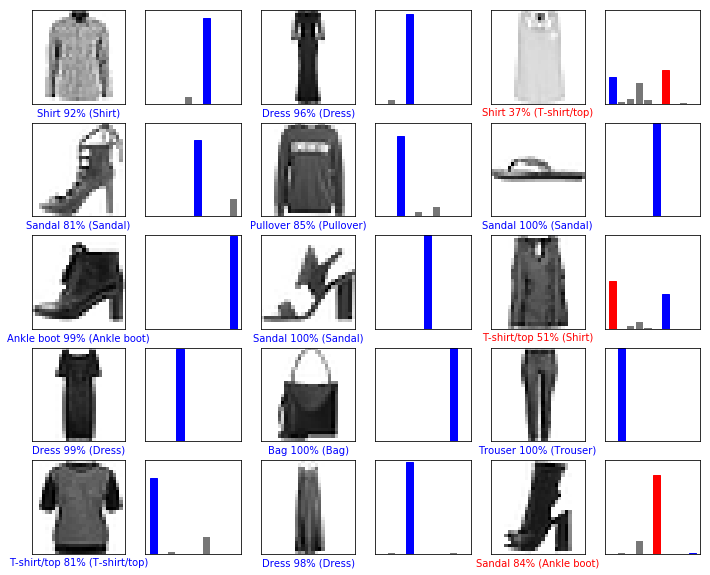

In [22]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [23]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [24]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [25]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.4043519e-04 3.3606788e-08 3.6200120e-03 6.6066917e-05 7.5357854e-02
  8.3867555e-08 9.2076212e-01 5.0293902e-09 5.3279909e-05 4.1175660e-08]]


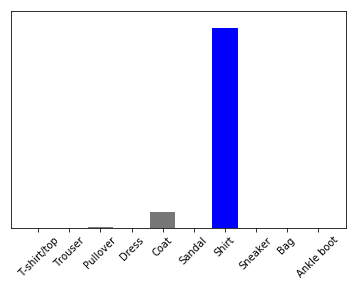

In [26]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

6